<a href="https://colab.research.google.com/github/AchiniR/DM-group-project/blob/lakshika-k-medoid/Netflix_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()
# reading data

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
# reading data
path = 'drive/MyDrive/Moramsc/datasets/netflix_india_shows_and_movies.csv'

original_df = pd.read_csv(path,index_col='showid')
df = original_df.copy()

In [3]:
# top 5 rows
df.head()

,name,type,rating,duration,description,hook_text,genre,release_year,release_date,mood_tag,actors,creator,director,audio,subtitles,tags,similar_titles_id,production_country
showid,,,,,,,,,,,,,,,,,,
81732726,Bhakshak,Movie,A,2.25,A struggling local journalist begins a dogged ...,NaN,Drama,2024.0,2024-2-9,Gritty,Bhumi Pednekar;Sanjay Mishra;Aditya Srivastava...,NaN,Pulkit,English;Hindi - Audio Description;Hindi [Origi...,English;English;Hindi,Hindi-Language Movies;Bollywood Movies;Crime M...,81671215;81637260;81725616;81637261;81740214;8...,India
81616617,Ashes,Movie,A,1.6667,From an intoxicating fantasy to a dangerous af...,NaN,Drama,2024.0,2024-2-9,Psychological;Intimate;Romantic,Funda Eryiğit;Alperen Duymaz;Mehmet Günsür;Nur...,NaN,Erdem Tepegöz,English;Turkish - Audio Description;Turkish [O...,English;English;Turkish,Turkish;Dramas;Romantic Movies,81732726;81256740;81671215;81637260;81566662;8...,Turkey
70305903,Interstellar,Movie,U/A 13+,2.8167,With humanity teetering on the brink of extinc...,NaN,Sci-Fi,2014.0,2024-2-9,Mind-Bending;Cerebral,Matthew McConaughey;Anne Hathaway;Jessica Chas...,NaN,Christopher Nolan,English [Original],English;Hindi,Sci-Fi Movies;Dramas;Action & Adventure Movies...,70131314;81198930;80117456;80023689;80244645;8...,United States
81607354,A Killer Paradox,TVSeries,A,1 Season,"When one accidental killing leads to another, ...",NaN,Thriller,2024.0,2024-2-9,Offbeat;Suspenseful,Choi Woo-shik;Son Suk-ku;Lee Hee-jun,Lee Chang-hee;Kim Da-min,NaN,NaN,NaN,Korean;Crime TV Shows;K-dramas based on Webtoo...,81444051;81461539;81011211;81640988;80990668;8...,South Korea
81611991,"Lover, Stalker, Killer",Movie,U/A 16+,1.5,"In this twisting documentary, a mechanic tries...",NaN,Documentary,2024.0,2024-2-9,NaN,NaN,NaN,Sam Hobkinson,English - Audio Description;English [Original],English,Documentaries;Crime Movies;True Crime Document...,81671836;81130130;81620852;81607097;81212487;8...,NaN


In [4]:
# dataframe shape
df.shape

(6666, 18)

In [5]:
# unique values in each column
df.nunique()

name                  6596
type                     2
rating                   5
duration               205
description           6527
hook_text             3106
genre                   20
release_year            56
release_date          1840
mood_tag               983
actors                5667
creator               1056
director              3083
audio                  260
subtitles              125
tags                  3474
similar_titles_id     6654
production_country      57
dtype: int64

In [6]:
# Checking for duplicate records
df.duplicated().value_counts()

False    6666
dtype: int64

# Data Cleaning

<Axes: ylabel='showid'>

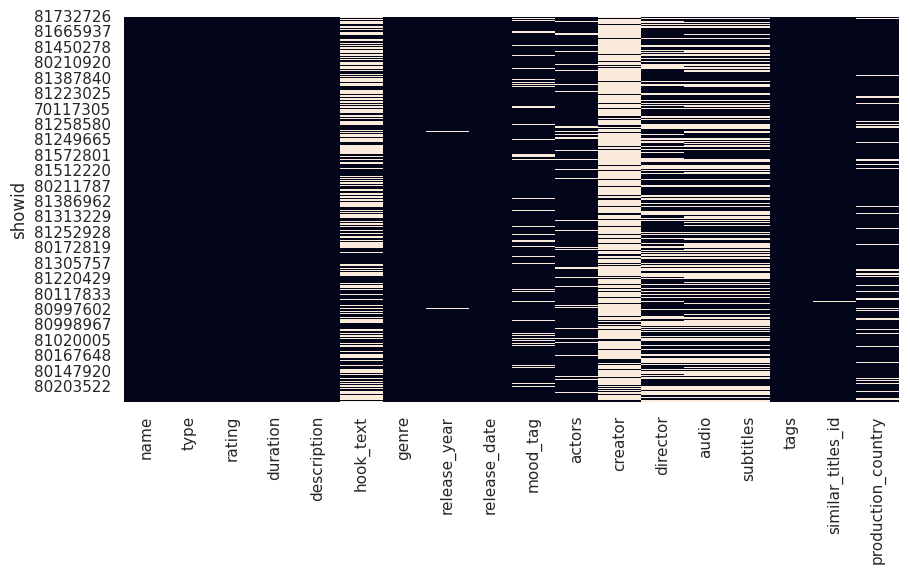

In [7]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)

In [8]:
# Missing values in the dataset
df.isna().sum()

name                     0
type                     0
rating                   0
duration                 0
description              0
hook_text             3514
genre                    0
release_year            13
release_date             0
mood_tag               646
actors                 664
creator               5497
director              2429
audio                 2688
subtitles             2689
tags                     0
similar_titles_id       10
production_country     550
dtype: int64

In [9]:
# Checking the unique values in each attribute of the dataset
df.nunique()

name                  6596
type                     2
rating                   5
duration               205
description           6527
hook_text             3106
genre                   20
release_year            56
release_date          1840
mood_tag               983
actors                5667
creator               1056
director              3083
audio                  260
subtitles              125
tags                  3474
similar_titles_id     6654
production_country      57
dtype: int64

In [10]:
# Handling the missing values
df[['hook_text','mood_tag','actors','director','audio','subtitles','production_country']] = df[['hook_text','mood_tag','actors','director','audio','subtitles','production_country']].fillna('Unknown')
df[['similar_titles_id']] = df[['similar_titles_id']].fillna(-1)
df.drop('creator', axis=1, inplace=True)
df.drop('release_year', axis=1, inplace=True)

In [11]:
df.isna().sum()

name                  0
type                  0
rating                0
duration              0
description           0
hook_text             0
genre                 0
release_date          0
mood_tag              0
actors                0
director              0
audio                 0
subtitles             0
tags                  0
similar_titles_id     0
production_country    0
dtype: int64

In [12]:
df.shape

(6666, 16)

## audio,subtiles,mood_tag,tag

In [13]:
# audio
df.audio.value_counts()

Unknown                                                                                                2688
English - Audio Description;English [Original]                                                          674
English - Audio Description;English [Original];Hindi                                                    499
English [Original]                                                                                      439
Hindi [Original]                                                                                        275
                                                                                                       ... 
English - Audio Description;English [Original];Hindi - Audio Description;Hindi;Kannada;Tamil;Telugu       1
Hindi;Malayalam [Original];Tamil;Telugu                                                                   1
English;Hindi;Yoruba [Original]                                                                           1
English - Audio Description;

In [14]:
# Subtitles
df.subtitles.value_counts()

Unknown                            2689
English                            2070
English;Hindi                       617
English;English;Hindi               131
English;Japanese                     91
                                   ... 
English;Hindi;Turkish                 1
English;English;Turkish;Turkish       1
English;Hindi;Malayalam               1
English;English;English               1
Arabic;English;English                1
Name: subtitles, Length: 126, dtype: int64

In [15]:
df.mood_tag.value_counts()


Unknown                         646
Exciting                        459
Goofy                           174
Suspenseful                     151
Feel-Good                       149
                               ... 
Controversial;Nostalgic           1
Mind-Bending;Ominous;Offbeat      1
Offbeat;Heartfelt;Romantic        1
Feel-Good;Emotional;Romantic      1
Absurd;Witty;Quirky               1
Name: mood_tag, Length: 984, dtype: int64

In [16]:
df.tags.value_counts()

Stand-Up Comedy                                                                                               240
Kids' TV;TV Cartoons                                                                                           52
Romantic Comedies;Comedy Movies;Romantic Movies;US Movies                                                      49
Family Features;Children & Family Movies;Comedy Movies;US Movies                                               38
Kids' TV;TV Comedies;TV Cartoons                                                                               35
                                                                                                             ... 
Family Features;Children & Family Movies;Dramas;Movies Based on Books;Movies Based on Real Life;US Movies       1
TV Dramas;Belgian;TV Comedies                                                                                   1
Brazilian;TV Mysteries;Crime TV Shows;Docuseries;True Crime Documentaries               

In [17]:
# Choosing the primary country and primary genre to simplify the analysis
df['audio'] = df['audio'].apply(lambda x: x.split(';')[0])
df['subtitles'] = df['subtitles'].apply(lambda x: x.split(';')[0])
df['mood_tag'] = df['mood_tag'].apply(lambda x: x.split(';')[0])
df['tags'] = df['tags'].apply(lambda x: x.split(';')[0])

In [18]:
# audio
df.genre.value_counts()

Drama               1731
Comedy              1345
Documentary          788
Kids                 642
Action               466
Thriller             356
Romance              351
Anime                287
Reality TV           259
Horror               221
Sci-Fi                85
Fantasy               65
Music                 26
Talk Show             10
Special Interest       9
Variety TV             9
Musical                7
Sports                 4
Western                4
Friendship             1
Name: genre, dtype: int64

In [19]:
# audio
df.audio.value_counts()

Unknown                        2688
English - Audio Description    1322
English                         594
English [Original]              544
Hindi [Original]                280
                               ... 
Hausa [Original]                  1
Arabic (Egypt)                    1
Xhosa [Original]                  1
Arabic (Tunisia) [Original]       1
Dutch [Original]                  1
Name: audio, Length: 98, dtype: int64

In [20]:
# subtitles
df.subtitles.value_counts()

English                  3864
Unknown                  2689
German                     51
Arabic                     41
Danish                      7
Bangla                      5
Malay                       3
Arabic (Egypt)              2
Arabic (Saudi Arabia)       1
English - Dubbed            1
Czech                       1
Arabic (Lebanon)            1
Name: subtitles, dtype: int64

In [21]:
df.mood_tag.value_counts()

Unknown            646
Exciting           484
Inspiring          271
Emotional          262
Suspenseful        260
Gritty             256
Goofy              256
Witty              231
Feel-Good          214
Raunchy            209
Quirky             209
Provocative        191
Heartfelt          189
Offbeat            184
Investigative      182
Ominous            178
Intimate           167
Bittersweet        158
Psychological      150
Charming           145
Understated        145
Violent            144
Dark               144
Sentimental        135
Nostalgic          132
Swoonworthy        126
Cerebral           115
Chilling           111
Deadpan            101
Adrenaline Rush    101
Absurd              99
Romantic            79
Relaxing            78
Mind-Bending        71
Scandalous          61
Scary               58
Steamy              56
Campy               39
Controversial       29
Name: mood_tag, dtype: int64

In [22]:
df.tags.value_counts()

TV Dramas                         679
Kids' TV                          404
Hindi-Language Movies             324
Dramas                            315
Stand-Up Comedy                   241
                                 ... 
Greek                               1
TV Thrillers                        1
Swiss                               1
Nature & Ecology Documentaries      1
Czech                               1
Name: tags, Length: 120, dtype: int64

# Typecasting 'duration' from string to integer

In [23]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].astype(str)
df['duration'] = df['duration'].apply(lambda x: float(x.split()[0]))

In [24]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

array([2.25  , 1.6667, 2.8167, 1.5   , 2.7   , 1.8   , 1.9   , 2.9167,
       2.0667, 1.5333, 2.2   , 2.4333, 1.55  , 2.15  , 0.9333, 1.7333,
       1.7   , 2.3333, 2.35  , 1.6333, 2.4167, 2.3167, 1.4833, 1.4167,
       1.6167, 1.7167, 1.8167, 1.5667, 1.6833, 2.7167, 1.5833, 2.6   ,
       2.5833, 0.8333, 2.2833, 3.4   , 0.6   , 2.4667, 2.    , 0.4167,
       2.4   , 1.4   , 1.65  , 1.8333, 1.9667, 2.1833, 1.4667, 1.15  ,
       1.85  , 1.0833, 2.0167, 2.3   , 1.75  , 2.9333, 2.2667, 2.45  ,
       2.5333, 2.3667, 2.7333, 1.7667, 2.05  , 1.8667, 1.9333, 1.3333,
       0.8667, 1.95  , 2.1167, 0.2833, 2.6667, 1.    , 1.8833, 1.4333,
       0.65  , 1.9833, 0.55  , 2.5   , 2.1333, 2.0833, 1.0667, 1.5167,
       1.7833, 2.1   , 2.2333, 0.9667, 1.2   , 0.9   , 1.2833, 1.9167,
       1.6   , 1.3   , 1.1167, 2.3833, 2.0333, 2.95  , 1.0167, 1.45  ,
       1.3167, 1.3667, 0.8833, 1.1   , 1.05  , 1.0333, 1.1333, 1.2167,
       2.2167, 1.1667, 1.25  , 1.35  , 2.75  , 2.55  , 2.6167, 0.85  ,
      

In [25]:
# datatype of duration
df.duration.dtype

dtype('float64')

# Typecasting 'release_date' from string to datetime:

In [26]:
# Typecasting release_date from string to datetime
df["release_date"] = pd.to_datetime(df['release_date'])

In [27]:
# first and last date on which a show was added on Netflix
df.release_date.min(),df.release_date.max()

(Timestamp('1970-01-01 00:00:00'), Timestamp('2024-02-09 00:00:00'))

In [28]:
# Adding new attributes month and year of date added

df['release_month'] = df['release_date'].dt.month
df['release_year'] = df['release_date'].dt.year
df.drop('release_date', axis=1, inplace=True)

# Ratings

<Axes: xlabel='rating', ylabel='count'>

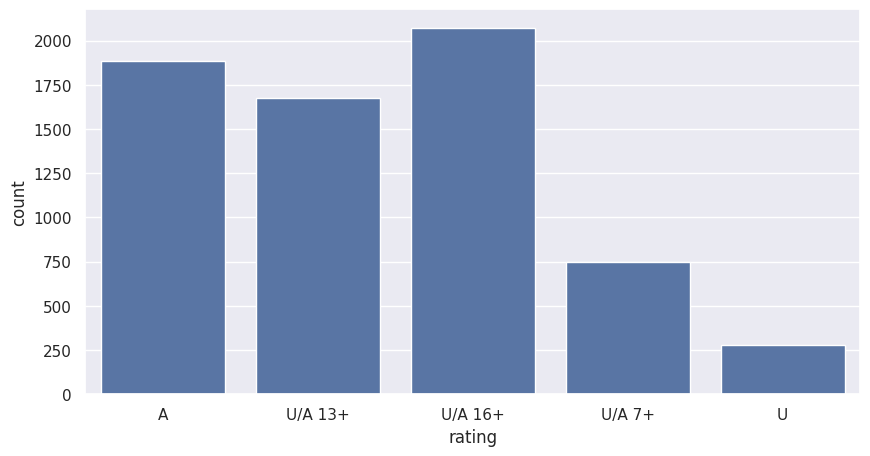

In [29]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

# Exploratory Data Analysis

# Univatiate Analysis:

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

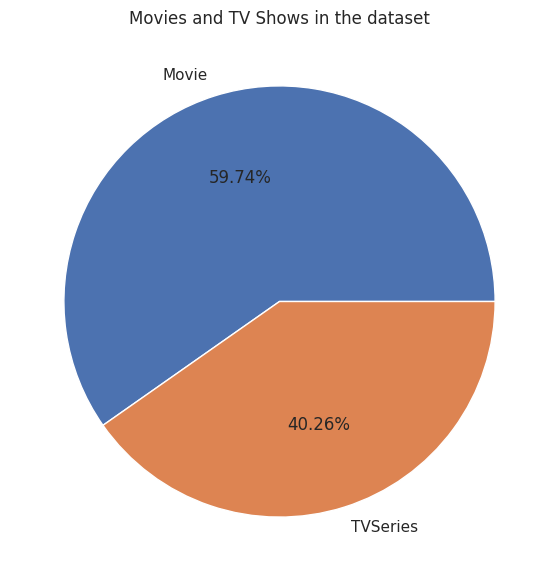

In [30]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

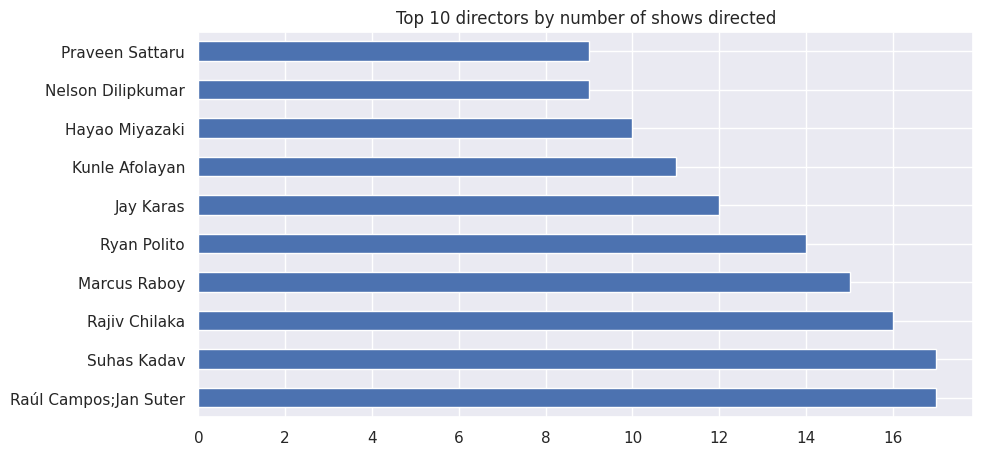

In [31]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

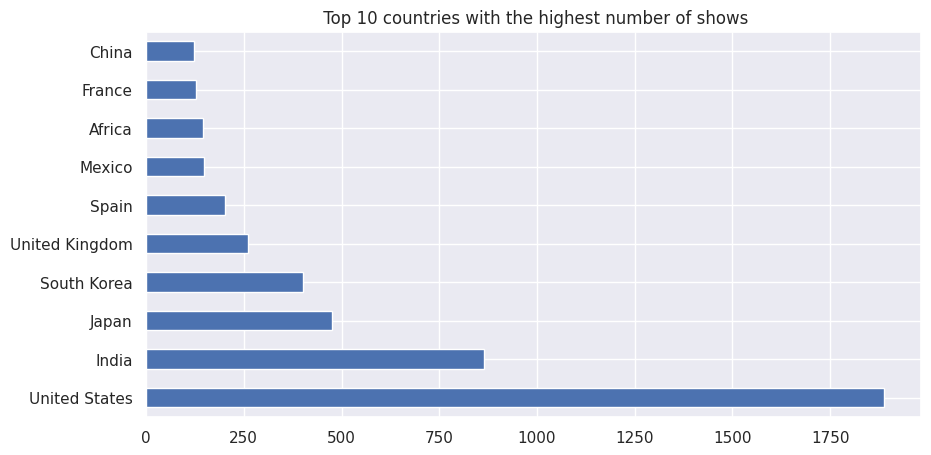

In [32]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['production_country']=='Unknown')].production_country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

In [33]:
# % share of movies / tv shows by top 3 countries
df.production_country.value_counts().nlargest(3).sum()/len(df)*100

49.549954995499554

In [34]:
# % share of movies / tv shows by top 10 countries
df.production_country.value_counts().nlargest(10).sum()/len(df)*100

75.997599759976

Text(0.5, 1.0, 'distribution by released year')

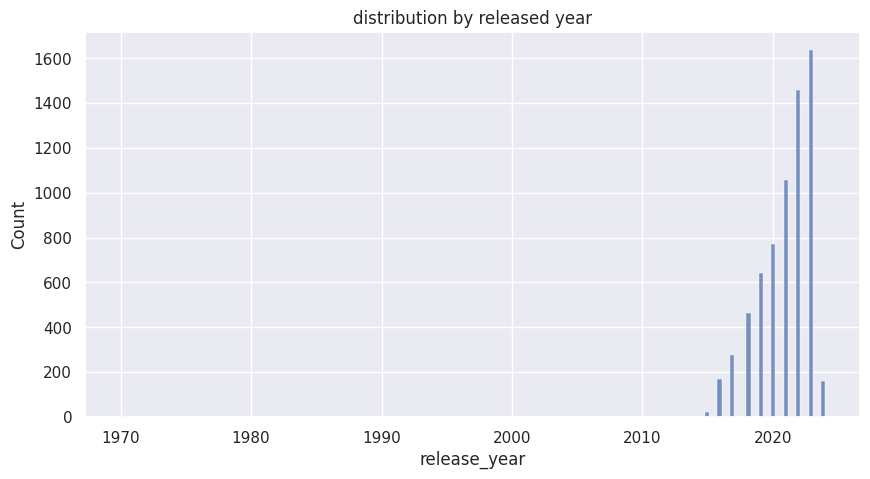

In [35]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

Text(0.5, 1.0, 'distribution by released year')

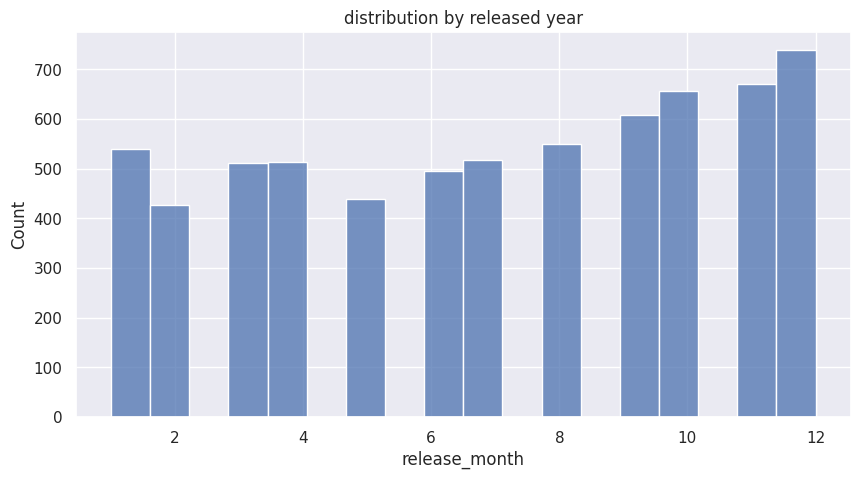

In [36]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(df['release_month'])
plt.title('distribution by released year')

In [37]:
df.release_month.head()

showid
81732726    2
81616617    2
70305903    2
81607354    2
81611991    2
Name: release_month, dtype: int64

Text(0.5, 1.0, 'Top 10 genres')

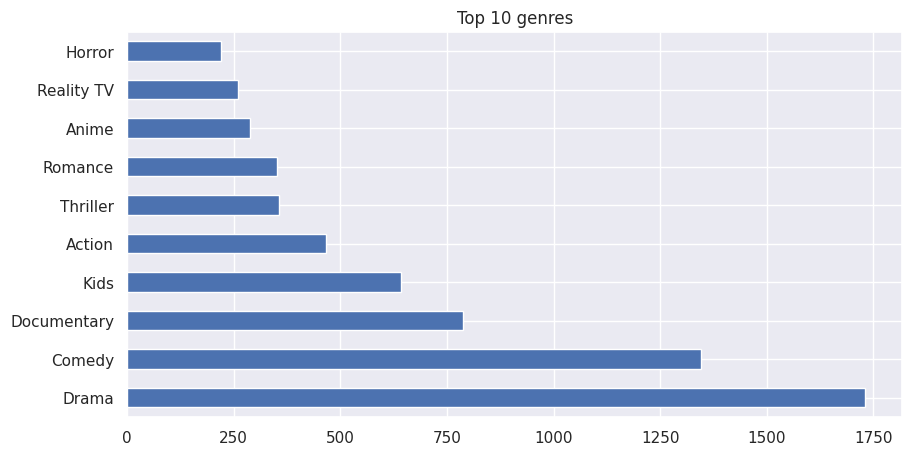

In [38]:
# Top 10 genres
plt.figure(figsize=(10,5))
df.genre.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

In [39]:
# Share of top 3 genres
df.genre.value_counts().nlargest(3).sum()/len(df)*100

57.96579657965797

In [40]:
# Share of top 10 genres
df.genre.value_counts().nlargest(10).sum()/len(df)*100

96.69966996699671

Text(0.5, 0, '')

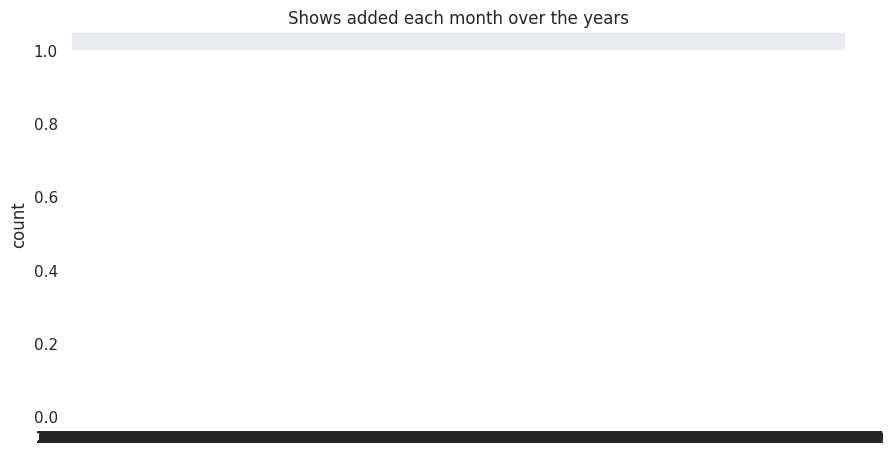

In [41]:
# Number of shows added on different months
plt.figure(figsize = (10,5))
sns.countplot(df['release_month'])
plt.title('Shows added each month over the years')
plt.xlabel('')

Text(0.5, 0, '')

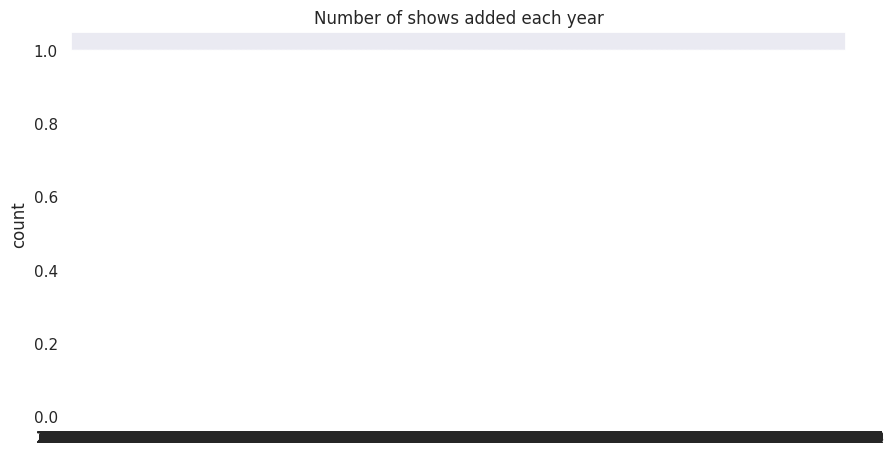

In [42]:
# Number of shows added over the years
plt.figure(figsize = (10,5))
sns.countplot(df['release_year'])
plt.title('Number of shows added each year')
plt.xlabel('')

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

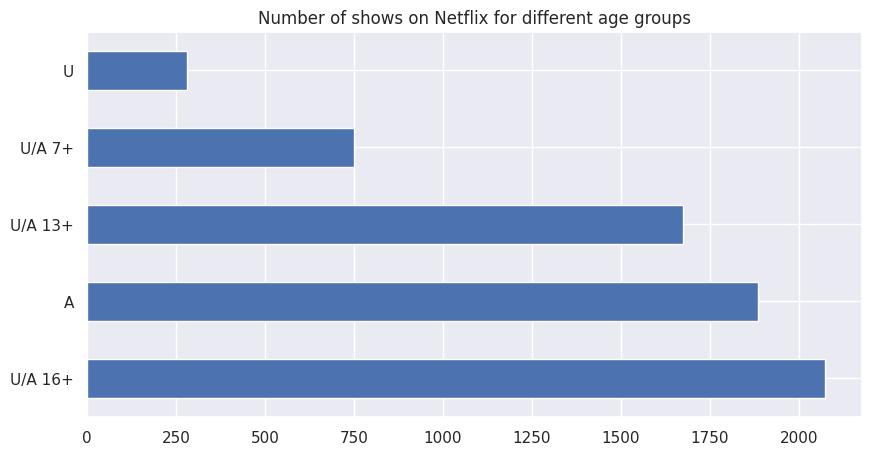

In [43]:
# Number of shows on Netflix for different age groups
plt.figure(figsize=(10,5))
df.rating.value_counts().plot(kind='barh')
plt.title('Number of shows on Netflix for different age groups')

<Axes: xlabel='release_year', ylabel='count'>

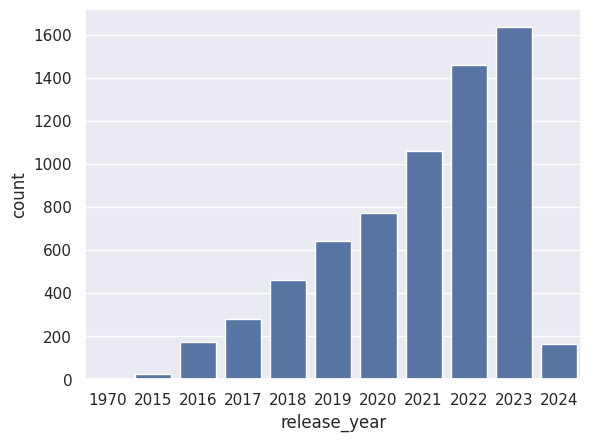

In [44]:
sns.countplot(data=df,x='release_year')

# Bivariate Analysis

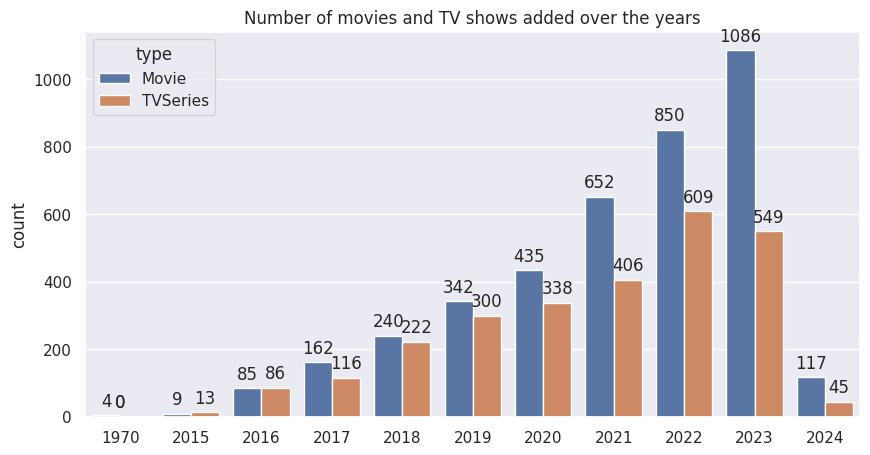

In [45]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

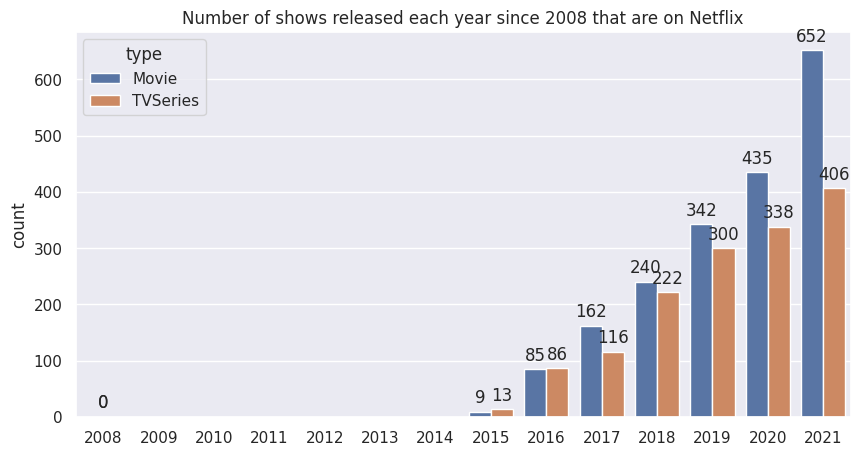

In [46]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

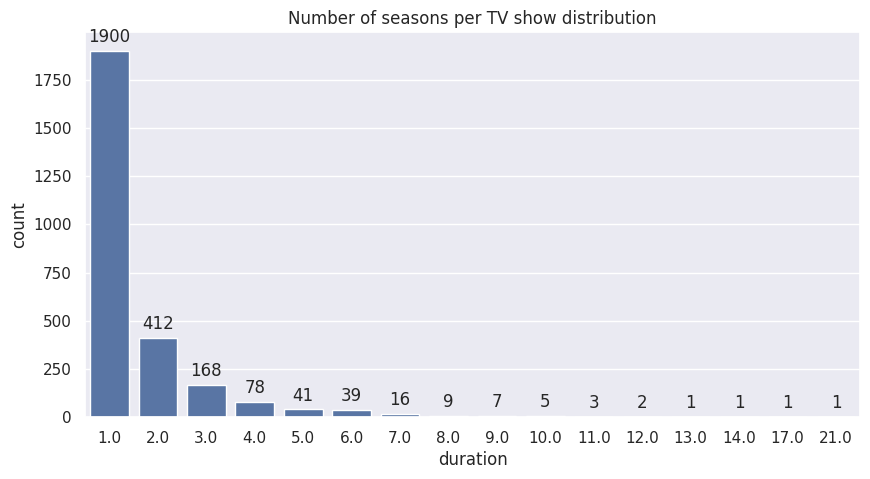

In [47]:
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TVSeries'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [48]:
# % of tv shows with just 1 season
len(df[(df['type']=='TVSeries') & (df['duration']==1)]) / len(df[df['type']=='TVSeries'])* 100

70.78986587183309

Text(0.5, 1.0, 'Movie duration distribution')

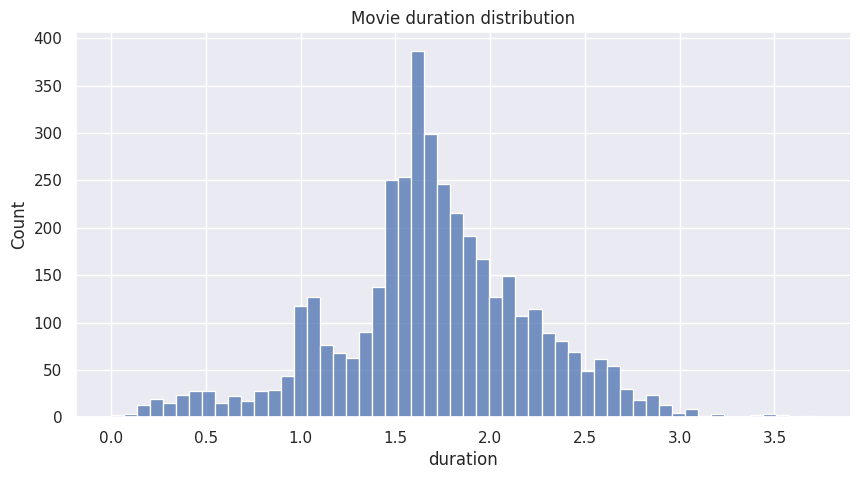

In [49]:
# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

In [50]:
# Movie statistics
df[df['type']== 'Movie'].duration.describe()

count    3982.000000
mean        1.696535
std         0.522141
min         0.000000
25%         1.450000
50%         1.683300
75%         2.000000
max         3.716700
Name: duration, dtype: float64

Text(0.5, 0, 'Year')

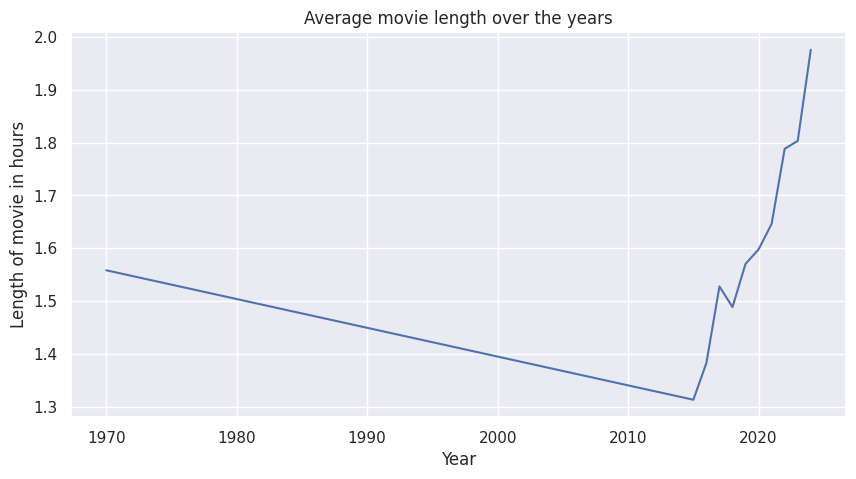

In [51]:
# Average movie length over the years
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in hours')
plt.xlabel('Year')

In [52]:
# Movie release year statistics
df[df['type']== 'Movie'].release_year.describe()

count    3982.000000
mean     2021.050979
std         2.538062
min      1970.000000
25%      2020.000000
50%      2022.000000
75%      2023.000000
max      2024.000000
Name: release_year, dtype: float64

Text(0.5, 1.0, 'Top 10 genres for movies')

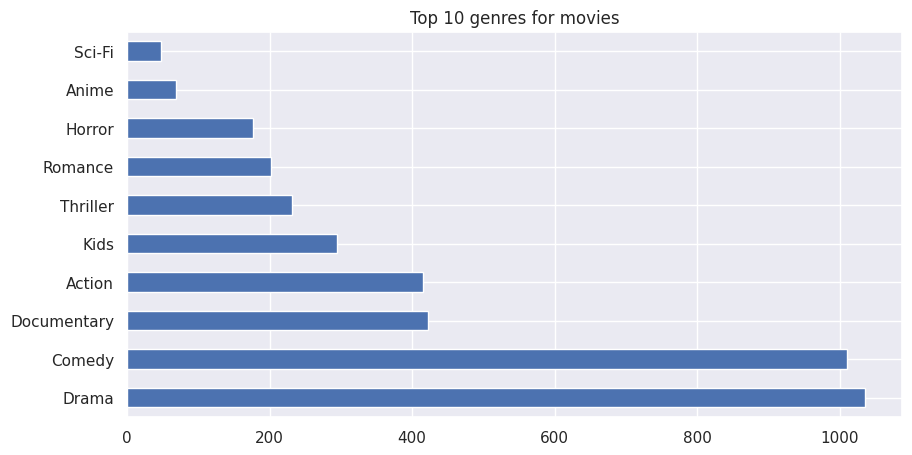

In [53]:
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].genre.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

Text(0.5, 1.0, 'Top 10 genres for TV Shows')

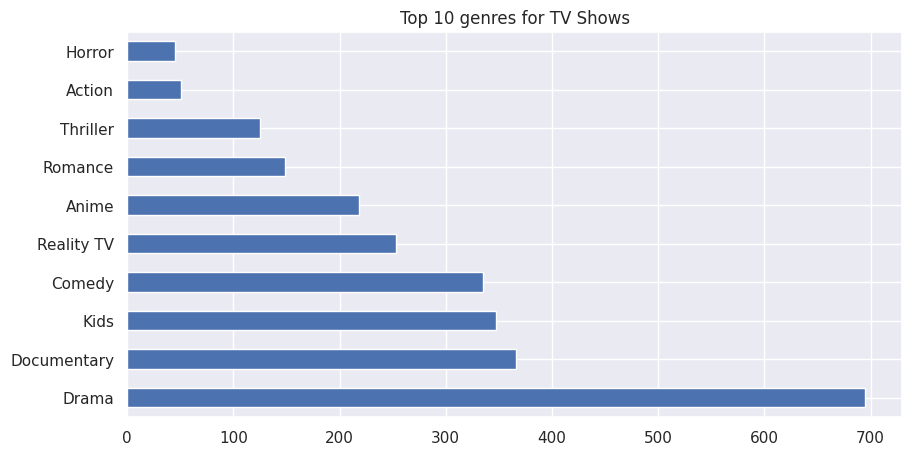

In [54]:
# Top 10 genre for tv shows
plt.figure(figsize=(10,5))
df[df['type']=='TVSeries'].genre.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')

Drama,Documentary and kids are the most popular genre for TV shows on Netflix.

Text(0.5, 1.0, 'Top 10 movie directors')

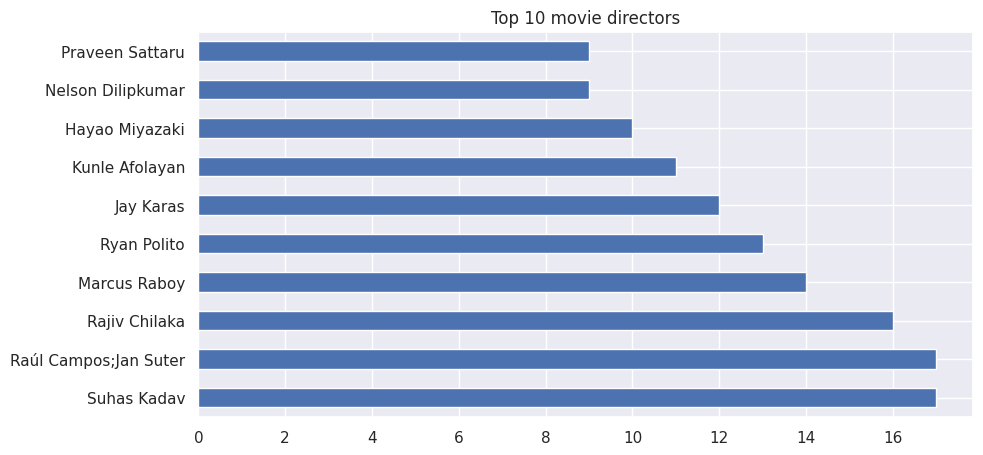

In [55]:
# Top 10 movie directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')

Raul Campos and Jan Suter, Suhas Kadav have directed in 18 movies each.

Text(0.5, 1.0, 'Top 10 TV show directors')

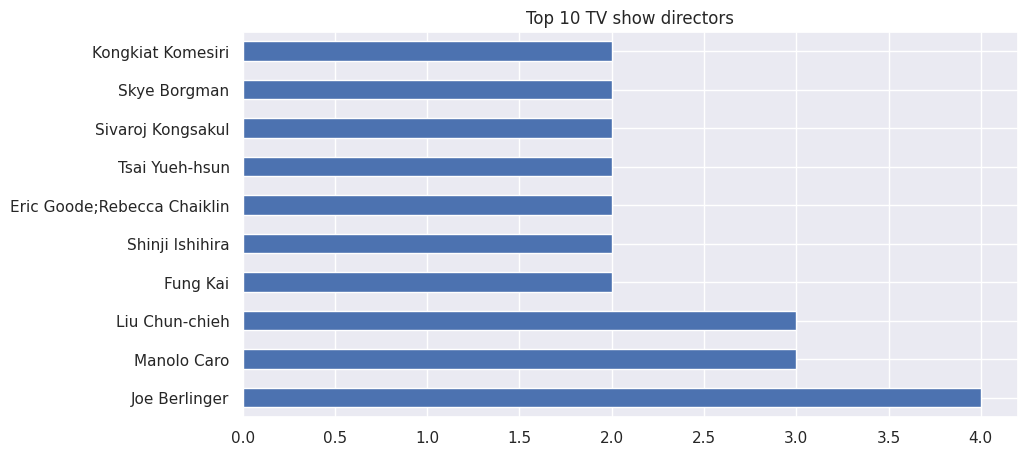

In [56]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='TVSeries')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV show directors')

Joe Berlinger has directed three TV shows, the most of any director.

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

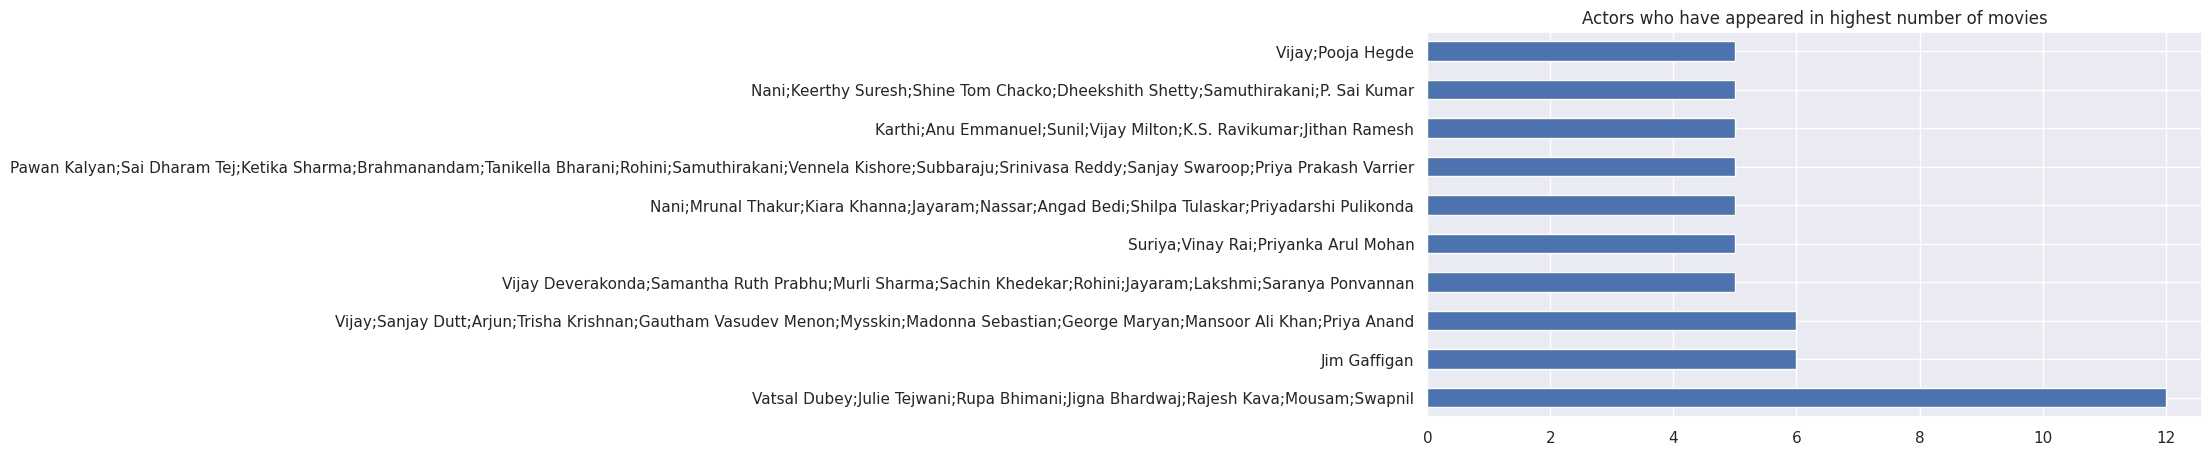

In [57]:
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['actors']=='Unknown') & (df['type']=='Movie')].actors.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

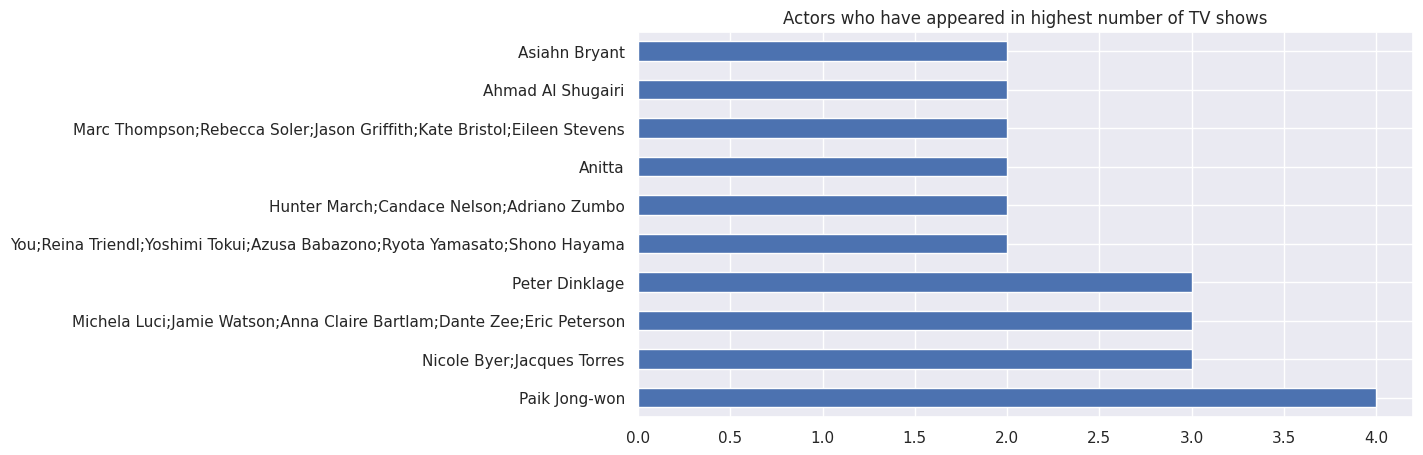

In [58]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['actors']=='Unknown') & (df['type']=='TVSeries')].actors.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

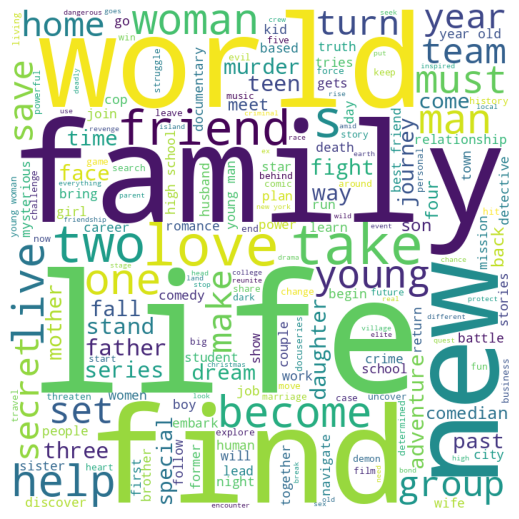

In [59]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6666 entries, 81732726 to 80196044
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6666 non-null   object 
 1   type                6666 non-null   object 
 2   rating              6666 non-null   object 
 3   duration            6666 non-null   float64
 4   description         6666 non-null   object 
 5   hook_text           6666 non-null   object 
 6   genre               6666 non-null   object 
 7   mood_tag            6666 non-null   object 
 8   actors              6666 non-null   object 
 9   director            6666 non-null   object 
 10  audio               6666 non-null   object 
 11  subtitles           6666 non-null   object 
 12  tags                6666 non-null   object 
 13  similar_titles_id   6666 non-null   object 
 14  production_country  6666 non-null   object 
 15  release_month       6666 non-null   int64  


Preprocessing

In [61]:
# Using the original dataset for clustering since
# it does not require handling missing values
df1 = original_df.copy()
df1.fillna('',inplace=True)
# Combining all the clustering attributes into a single column

df1['clustering_attributes'] = (df1['director'] + ' ' +
                                df1['hook_text'] +' ' +
                                df1['production_country'] +' ' +
                                df1['audio'] +' ' +
                                df1['subtitles'] +' ' +
                                df1['tags'] +' ' +
                                df1['actors'] +' ' +
                                df1['mood_tag'] +' ' +
                                df1['description'])

In [62]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
# remove non-ascii characters
df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])

In [63]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [64]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

In [65]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# Removing punctuation marks
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)


In [66]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas
# Lemmatization
df1['clustering_attributes'] = lemmatize_verbs(df1['clustering_attributes'])

In [67]:
tokenizer = TweetTokenizer()
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

In [68]:
# clustering tokens saved in a variable
clustering_data = df1['clustering_attributes']
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = tfidf.fit_transform(clustering_data)

In [69]:
X
# Shape of X
X.shape
# data type of vector
type(X)
# convert X into array form for clustering
X = X.toarray()

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [71]:
# Encode categorical features using one-hot encoding
categorical_features = ['rating', 'genre']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df[categorical_features])

# Scale numeric features
numeric_features = ['duration', 'release_month', 'release_year']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_features])

# Combine preprocessed features
preprocessed_features = pd.DataFrame(data=scaled_features, columns=numeric_features)
preprocessed_features = pd.concat([preprocessed_features, pd.DataFrame(data=encoded_features)], axis=1)
preprocessed_features = pd.concat([preprocessed_features, pd.DataFrame(data=X)], axis=1)

## PCA

In [72]:
preprocessed_features.columns = preprocessed_features.columns.astype(str)

Text(0, 0.5, 'cumulative explained variance')

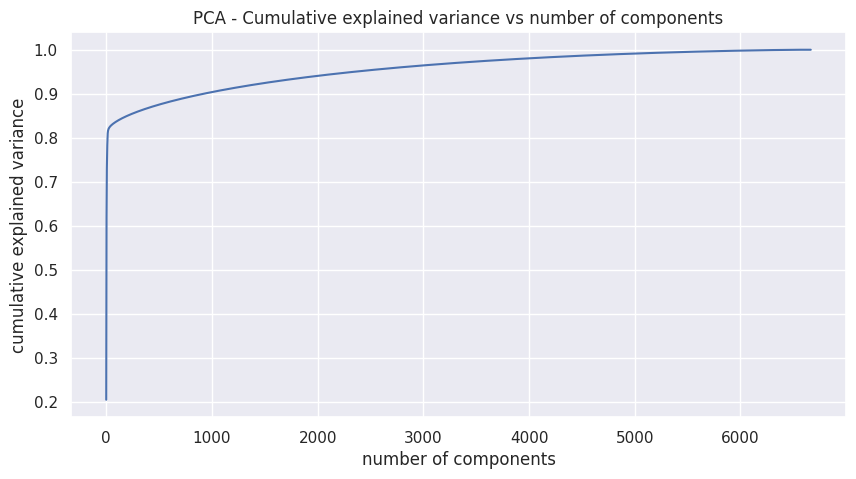

In [73]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit_transform(preprocessed_features)
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

We find that 100% of the variance is explained by about ~6500 components.
Also, more than 95% of the variance is explained just by 3000 components.
Hence to simplify the model, and reduce dimensionality, we can take the top 3000 components, which will still be able to capture more than 95% of variance.

In [74]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000,random_state=42)
pca.fit(preprocessed_features)
# transformed features
x_pca = pca.transform(preprocessed_features)
# shape of transformed vectors
x_pca.shape

(6666, 3000)

In [ ]:
from sklearn.metrics import silhouette_score
!pip install scikit-learn-extra
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

silhouette_scores = []

for k in range(2, 31):  # Minimum k is 2 for silhouette score
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    cluster_labels = kmedoids.fit_predict(preprocessed_features)
    silhouette_avg = silhouette_score(preprocessed_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(2, 31), silhouette_scores, marker='o', linestyle='-', color='g')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(np.arange(2, 31))
plt.show()


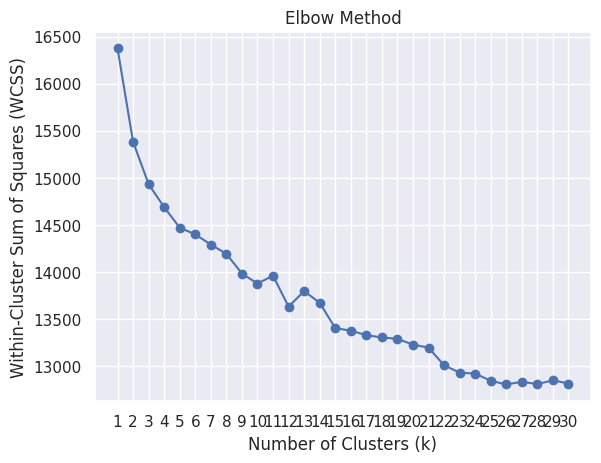

In [85]:
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np


wcss = []
max_clusters = 30  # Max number of clusters to try

for k in range(1, max_clusters + 1):
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    kmedoids.fit(preprocessed_features)
    wcss.append(kmedoids.inertia_)  # Inertia is WCSS

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, max_clusters + 1))
plt.show()


In [79]:
from sklearn.metrics import silhouette_score
!pip install scikit-learn-extra
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np
# Specify the number of clusters
k = 7

# Initialize the KMedoids model
kmedoids = KMedoids(n_clusters=k, random_state=0)

# Fit the model to the data
kmedoids.fit(preprocessed_features)

# Get cluster labels and cluster centers (medoids)
cluster_labels = kmedoids.labels_
cluster_centers_indices = kmedoids.medoid_indices_
print(cluster_centers_indices)

# Print cluster labels
print("Cluster Labels:", cluster_labels)



[2873 4666  415 1013 4219 5221 1821]
Cluster Labels: [3 3 3 ... 5 5 5]


In [82]:
# Print cluster centers (medoids)
print("Cluster Centers (Medoids):")
for medoid_index in cluster_centers_indices:
    print(preprocessed_features[medoid_index])

Cluster Centers (Medoids):


KeyError: 2873

In [83]:
# Print cluster centers (medoids)
print("Cluster Centers (Medoids):")
for medoid_index in cluster_centers_indices:
    try:
        print(preprocessed_features.iloc[medoid_index])
    except IndexError:
        print("Invalid index:", medoid_index)


Cluster Centers (Medoids):
duration         0.455732
release_month    1.141877
release_year     0.459306
0                0.000000
1                0.000000
                   ...   
19995            0.000000
19996            0.000000
19997            0.000000
19998            0.000000
19999            0.000000
Name: 2873, Length: 20026, dtype: float64
duration         0.290711
release_month   -0.839318
release_year    -0.391530
0                0.000000
1                0.000000
                   ...   
19995            0.000000
19996            0.000000
19997            0.000000
19998            0.000000
19999            0.000000
Name: 4666, Length: 20026, dtype: float64
duration         0.059523
release_month    0.292793
release_year     0.884724
0                0.000000
1                0.000000
                   ...   
19995            0.000000
19996            0.000000
19997            0.000000
19998            0.000000
19999            0.000000
Name: 415, Length: 20026, dtype

In [91]:
from sklearn.metrics import silhouette_score

# Assuming you have already fitted the k-medoids model to the data
silhouette_avg = silhouette_score(preprocessed_features, kmedoids.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.040448630117174825


In [89]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(preprocessed_features, kmedoids.labels_)
print("Davies-Bouldin Index:", db_index)


Davies-Bouldin Index: 33.63853934753508


In [94]:
from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(preprocessed_features, kmedoids.labels_)
print("Calinski-Harabasz Index:", ch_index)


Calinski-Harabasz Index: 476.9266453729061


In [93]:
# Adding a kmeans cluster number attribute
df1['kmedoids_cluster'] = kmedoids.labels_

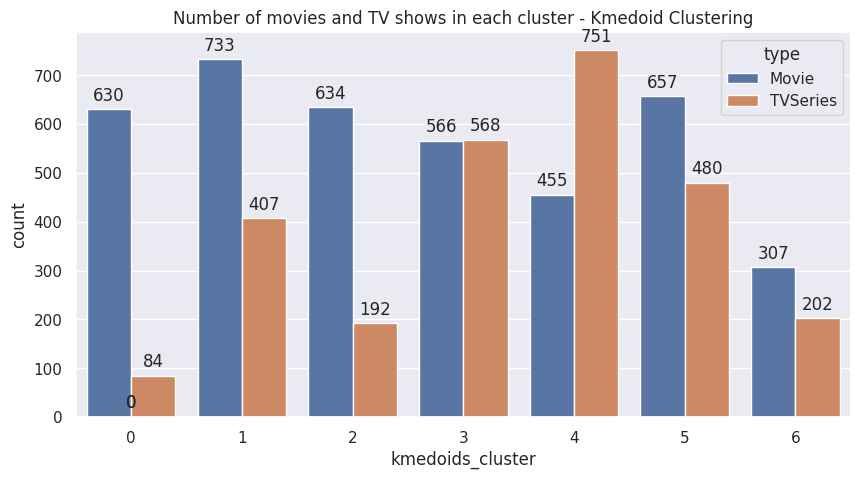

In [96]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmedoids_cluster',data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmedoid Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Building wordclouds for different clusters built:

In [97]:
# Building a wordcloud for the movie descriptions
def kmedoids_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['kmedoids_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

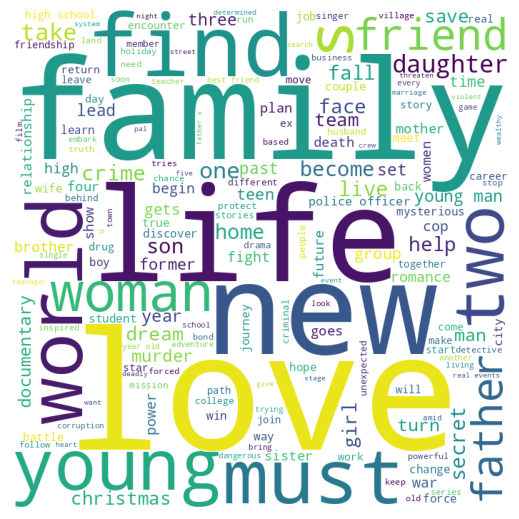

In [98]:
# Wordcloud for cluster 0
kmedoids_worldcloud(0)

Keywords observed in cluster 0: life, new, family, friend, love, world, young, must

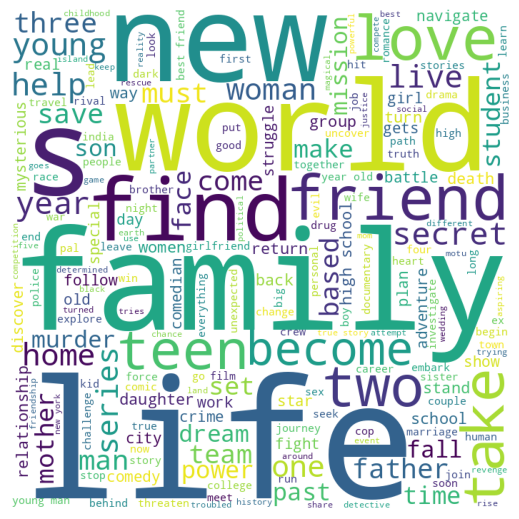

In [100]:
# Wordcloud for cluster 1
kmedoids_worldcloud(1)

Keywords observed in cluster 0: life, new, family, friend, love, world, young, teen

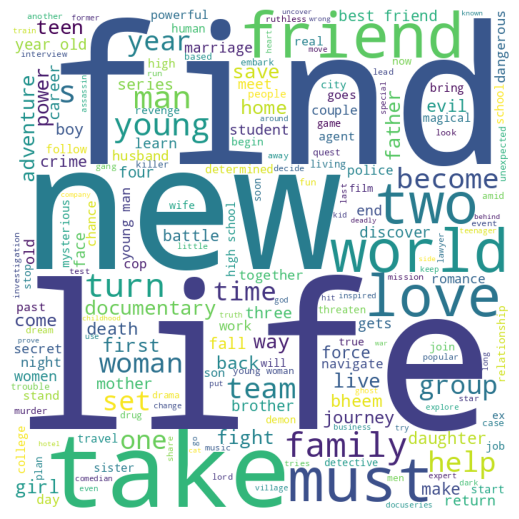

In [101]:
# Wordcloud for cluster 2
kmedoids_worldcloud(2)

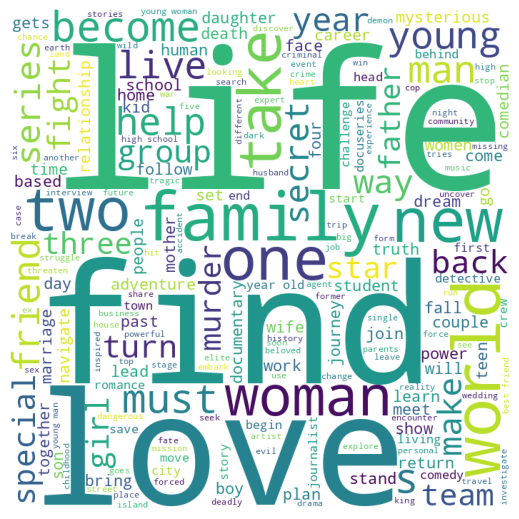

In [102]:
# Wordcloud for cluster 3
kmedoids_worldcloud(3)

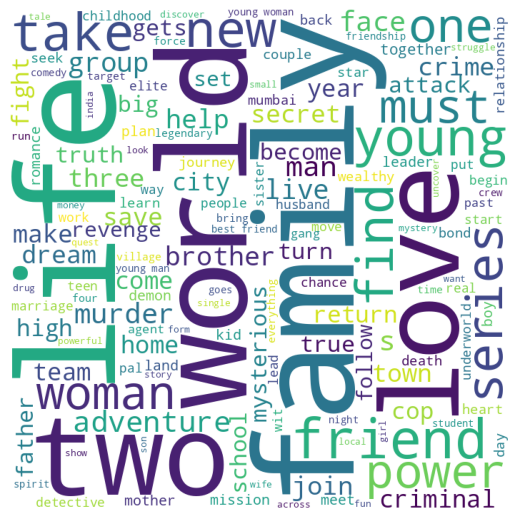

In [105]:
# Wordcloud for cluster 4
kmedoids_worldcloud(6)